<a href="https://colab.research.google.com/github/NourAbouElMakarem/20P3076-Padel-System/blob/main/Decoder_so_far_V1_GapFilling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ddeh betconsider el ecls around 1 bas

w feha both codes for filling

#Imports

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
!pip install --upgrade reedsolo
import reedsolo as rs

#Import and binarize

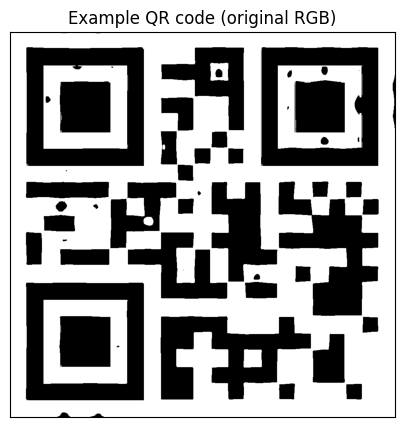

In [2]:
img = cv2.cvtColor(cv2.imread("11-wewewewe_corrected.png"), cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.title('Example QR code (original RGB)')
plt.imshow(img, cmap='gray');

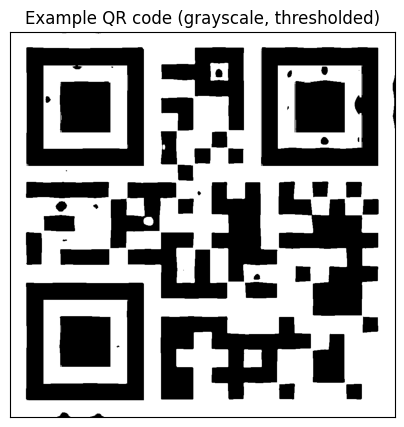

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
_, img = cv2.threshold(img, 142, 255, cv2.THRESH_BINARY)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.title('Example QR code (grayscale, thresholded)')
plt.imshow(img, cmap='gray');

#Use quite zone to detect code area

In [4]:
start_row = -1
end_row = -1
start_col = -1
end_col = -1
threshold_pixels = 200  # Number of black pixels to consider

# Find start_row (first black pixel from the top)
for row_index, row in enumerate(img):
    black_pixels_count = 0
    for pixel in row:
        if pixel != 255:  # Assuming black pixels are not white (255)
            black_pixels_count += 1
            if black_pixels_count >= threshold_pixels:
                start_row = row_index
                break
    if start_row != -1:
        break

# Find end_row (first black pixel from the bottom)
for row_index, row in enumerate(img[::-1]):
    black_pixels_count = 0
    for pixel in row:
        if pixel != 255:
            black_pixels_count += 1
            if black_pixels_count >= threshold_pixels:
                end_row = img.shape[0] - row_index
                break
    if end_row != -1:
        break

# Find start_col (first black pixel from the left)
for col_index, col in enumerate(cv2.transpose(img)):
    black_pixels_count = 0
    for pixel in col:
        if pixel != 255:
            black_pixels_count += 1
            if black_pixels_count >= threshold_pixels:
                start_col = col_index
                break
    if start_col != -1:
        break

# Find end_col (first black pixel from the right)
for col_index, col in enumerate(cv2.transpose(img)[::-1]):
    black_pixels_count = 0
    for pixel in col:
        if pixel != 255:
            black_pixels_count += 1
            if black_pixels_count >= threshold_pixels:
                end_col = img.shape[1] - col_index
                break
    if end_col != -1:
        break

print(start_row, end_row, start_col, end_col)

41 968 43 968


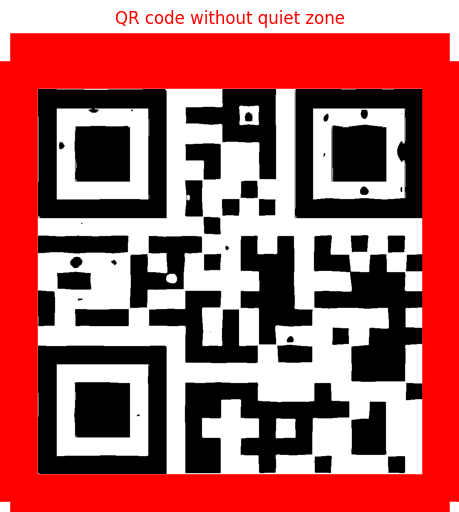

In [5]:
qr_no_quiet_zone = img[start_row:end_row, start_col:end_col]
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
fig.get_axes()[0].spines[:].set_color('red');
fig.get_axes()[0].spines[:].set_linewidth(40);
fig.get_axes()[0].spines[:].set_position(("outward", 20))
plt.title('QR code without quiet zone', y = 1.15, color='red');
plt.imshow(qr_no_quiet_zone, cmap='gray');

#Use Locator boxes to determine grid size

In [6]:
size = 0
for pixel in qr_no_quiet_zone[0]:
    if (pixel != 0): break
    size +=1

print("Size:",size)

Size: 45


###make generic in findint the version

In [7]:
# if qr_no_quiet_zone.shape div 21 ==0
#   v1
#   elif qr_no_quiet_zone.shape div 25 == 0
#     v2
#     elif qr_no_quiet_zone.shape div 29 == 0
#       v3
#     elif qr_no_quiet_zone.shape div 33 == 0 & qr_no_quiet_zone.shape div 29==0
#         V4
# problem is 16 staisfies both so maybe from top to bottom instead

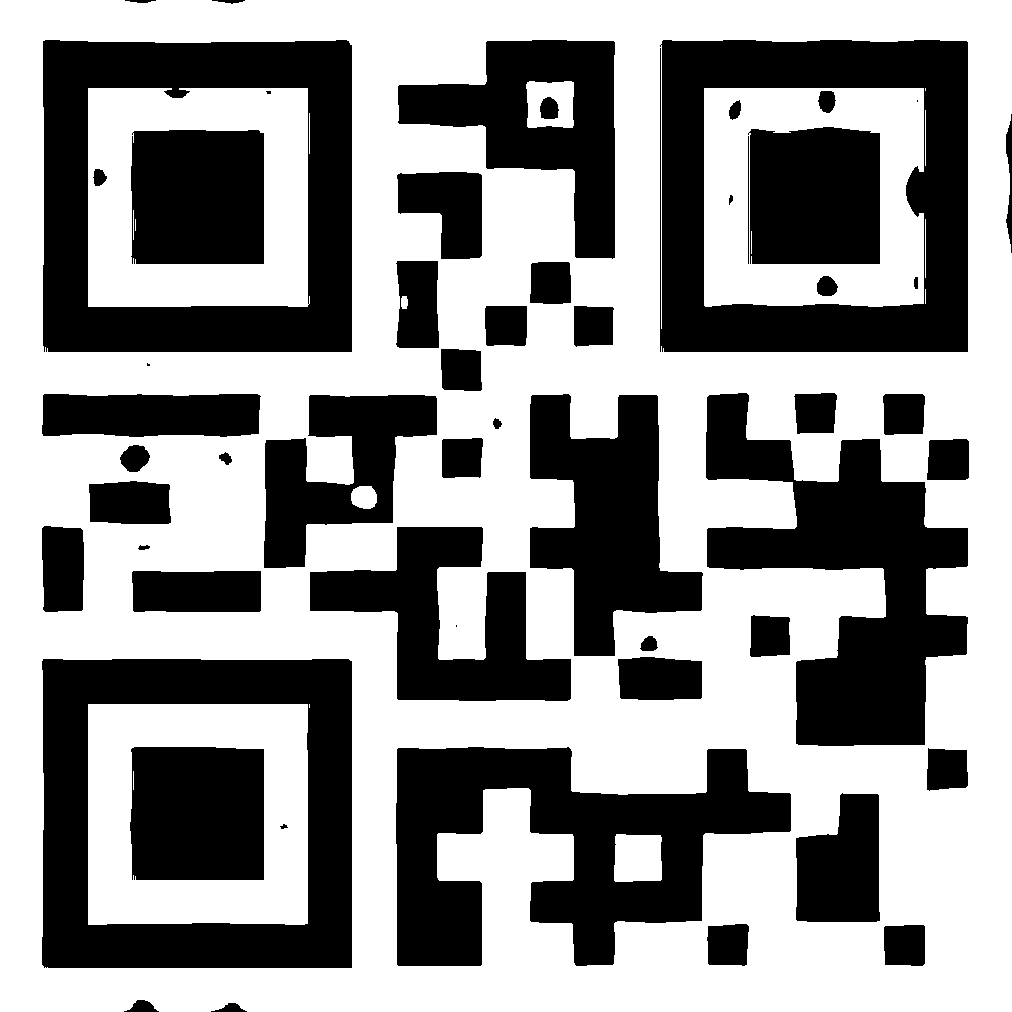

In [8]:
cv2_imshow( img)

In [9]:
# Therefore the grid cell size is..
#grid_cell_size = round(size/7)
#print(grid_cell_size)
num_of_grids=21
grid_cell_size=qr_no_quiet_zone.shape[0]//num_of_grids
print(grid_cell_size)

44


In [10]:
# And it each row/column is expected to have the following no. of qr_cells
#grid_cells_num = round(qr_no_quiet_zone.shape[0]/grid_cell_size)
#print(grid_cells_num)

grid_cells_num =21
print(grid_cells_num)

21


In [11]:
# So now it is time to split the following shape...
print(qr_no_quiet_zone.shape)

(927, 925)


In [12]:
resized_image=cv2.resize(
    qr_no_quiet_zone,
    (grid_cells_num*grid_cell_size, grid_cells_num*grid_cell_size),
    interpolation=cv2.INTER_LINEAR)
# ...into grid cells
qr_cells = resized_image.reshape((
    grid_cells_num,
    grid_cell_size,
    grid_cells_num,
    grid_cell_size,
)).swapaxes(1, 2)
print(qr_cells.shape)

(21, 21, 44, 44)


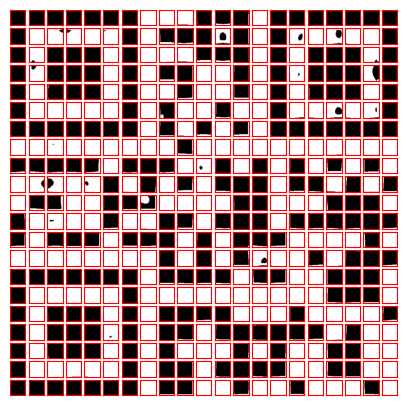

In [13]:
_, axes = plt.subplots(grid_cells_num, grid_cells_num, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        col.imshow(qr_cells[i][j], cmap="gray", vmin=0, vmax=255)
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)
        col.spines[:].set_color('red')


#Convert grid tiles to numeric values

In [14]:
qr_cells_numeric = np.ndarray((grid_cells_num, grid_cells_num), dtype=np.uint8)
for i, row in enumerate(qr_cells):
    for j, cell in enumerate(row):
        qr_cells_numeric[i, j] = (np.median(cell) // 255)

print(qr_cells_numeric)

[[0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0]
 [0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0]
 [0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1]
 [1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0]
 [1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1]
 [0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1]
 [0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1]
 [0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0]
 [0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1]
 [0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1]
 [0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1]
 [0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1]]


###hole filling?

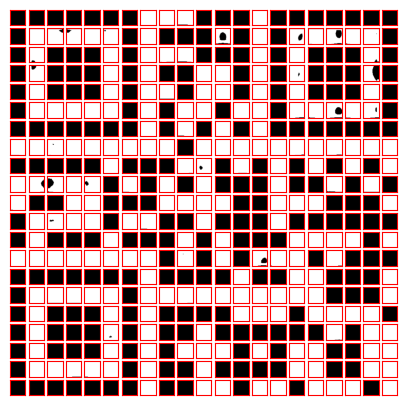

In [15]:
#if the mean of the cell is black the whole cell is black
#this is not always enough

_, axes = plt.subplots(grid_cells_num, grid_cells_num, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        if qr_cells_numeric[i, j] == 0:
            # If mean is 0, redraw the image with the cell actually 0
            col.imshow(np.zeros_like(qr_cells[i][j]), cmap="gray", vmin=0, vmax=255)
        else:
            col.imshow(qr_cells[i][j], cmap="gray", vmin=0, vmax=255)
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)
        col.spines[:].set_color('red')

plt.show()


###only if >=40%

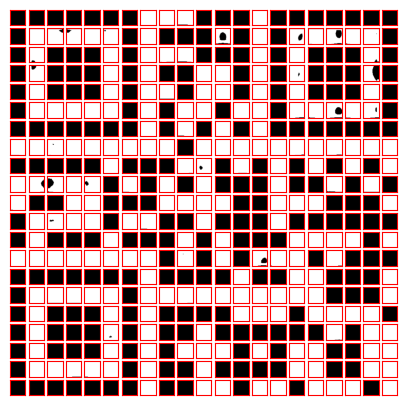

In [16]:
_, axes = plt.subplots(grid_cells_num, grid_cells_num, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        cell_mean = np.mean(qr_cells[i][j])
        if cell_mean <= 102:  # Assuming 51 as the threshold for 20% of the pixel range
            col.imshow(np.zeros_like(qr_cells[i][j]), cmap="gray", vmin=0, vmax=255)
        else:
            col.imshow(qr_cells[i][j], cmap="gray", vmin=0, vmax=255)
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)
        col.spines[:].set_color('red')

plt.show()


whitten the rest

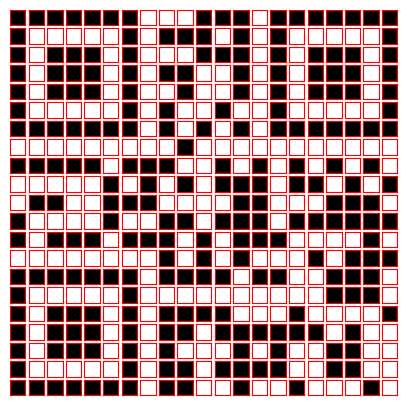

In [17]:
_, axes = plt.subplots(grid_cells_num, grid_cells_num, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        cell_mean = np.mean(qr_cells[i][j])
        if cell_mean <= 102:  # Setting the threshold to approximately 40% of the pixel range
            col.imshow(np.zeros_like(qr_cells[i][j]), cmap="gray", vmin=0, vmax=255)
        else:
            col.imshow(np.ones_like(qr_cells[i][j]) * 255, cmap="gray", vmin=0, vmax=255)  # Turn cell white
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)
        col.spines[:].set_color('red')

plt.show()


###without grids

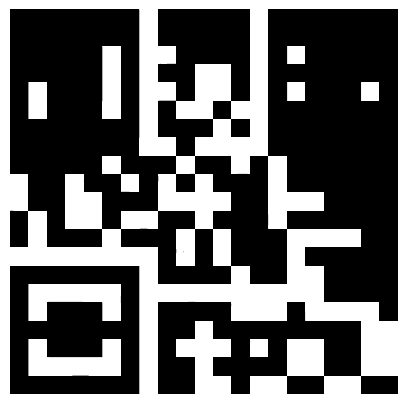

In [18]:
#reconstructing the actual qrcode
_, axes = plt.subplots(grid_cells_num, grid_cells_num, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        cell_mean = np.mean(qr_cells[i][j])
        cell_min = np.min(qr_cells[i][j])
        if cell_mean == 0 or cell_min == 0:  # Check if any percentage of the cell is black
            col.imshow(np.zeros_like(qr_cells[i][j]), cmap="gray", vmin=0, vmax=255)
        else:
            col.imshow(qr_cells[i][j], cmap="gray", vmin=0, vmax=255)
        col.axis('off')  # Turn off axis lines and labels
        col.spines['top'].set_visible(False)
        col.spines['right'].set_visible(False)
        col.spines['bottom'].set_visible(False)
        col.spines['left'].set_visible(False)

plt.subplots_adjust(wspace=0, hspace=0)  # Remove any extra space between the subplots
plt.show()

###more filling

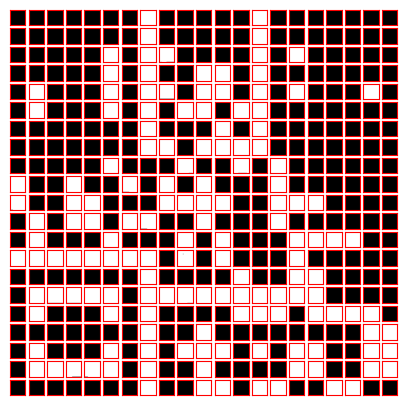

In [19]:
#if the cell contains any persentage of black the whole cell turns black

_, axes = plt.subplots(grid_cells_num, grid_cells_num, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        cell_mean = np.mean(qr_cells[i][j])
        cell_min = np.min(qr_cells[i][j])
        if cell_mean == 0 or cell_min == 0:  # Check if any percentage of the cell is black
            col.imshow(np.zeros_like(qr_cells[i][j]), cmap="gray", vmin=0, vmax=255)
        else:
            col.imshow(qr_cells[i][j], cmap="gray", vmin=0, vmax=255)
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)
        col.spines[:].set_color('red')

plt.show()


###without the reds

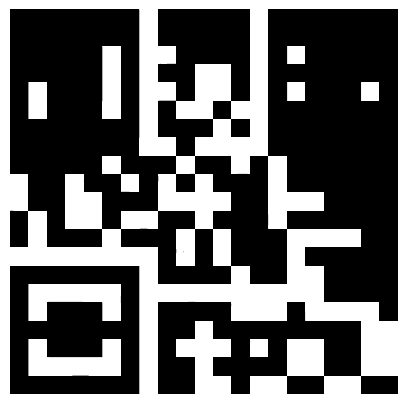

In [20]:
#reconstructing the actual qrcode
_, axes = plt.subplots(grid_cells_num, grid_cells_num, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        cell_mean = np.mean(qr_cells[i][j])
        cell_min = np.min(qr_cells[i][j])
        if cell_mean == 0 or cell_min == 0:  # Check if any percentage of the cell is black
            col.imshow(np.zeros_like(qr_cells[i][j]), cmap="gray", vmin=0, vmax=255)
        else:
            col.imshow(qr_cells[i][j], cmap="gray", vmin=0, vmax=255)
        col.axis('off')  # Turn off axis lines and labels
        col.spines['top'].set_visible(False)
        col.spines['right'].set_visible(False)
        col.spines['bottom'].set_visible(False)
        col.spines['left'].set_visible(False)

plt.subplots_adjust(wspace=0, hspace=0)  # Remove any extra space between the subplots
plt.show()


#Infromation extraction

##Error correction level

In [21]:
# We want row #8
qr_cells_numeric[8]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
      dtype=uint8)

In [22]:
# The first two bits determine the error correction level
# Level L (Low)         [11]    7%  of data bytes can be restored.
# Level M (Medium)      [10]    15% of data bytes can be restored.
# Level Q (Quartile)    [01]    25% of data bytes can be restored.
# Level H (High)        [00]    30% of data bytes can be restored.
ecl = [int(not(c)) for c in qr_cells_numeric[8, 0:2]]
# Why "not"? Because the standard uses '1's for black and '0's for white
#
# "A dark module is a binary one and a light module is a binary zero."
#  - ISO/IEC 18004:2000(E)
#
# In image processing, we use them the other way.. Hence the inversion
print(ecl)

[1, 1]


##Mask pattern

In [23]:
# Dictionary of all masks and their equivalent formulae
MASKS = {
    "000": lambda i, j: (i * j) % 2 + (i * j) % 3 == 0,
    "001": lambda i, j: (i / 2 + j / 3) % 2 == 0,
    "010": lambda i, j: ((i * j) % 3 + i + j) % 2 == 0,
    "011": lambda i, j: ((i * j) % 3 + i * j) % 2 == 0,
    "100": lambda i, j: i % 2 == 0,
    "101": lambda i, j: (i + j) % 2 == 0,
    "110": lambda i, j: (i + j) % 3 == 0,
    "111": lambda i, j: j % 3 == 0,
}

# Same row as above, the three cells after the ecl cells (converted to a string)
mask = [int(not(c)) for c in qr_cells_numeric[8, 2:5]]
mask_str = ''.join([str(c) for c in mask])
print(mask_str)

111


##Format error correction

In [24]:
# Same row as above, but we want cells #5 and #7 (#6 is always set to 0),
#  followed by column #8 from cell #0 in it to cell #7 (and skipping #6)
fec = []
fec.append(qr_cells_numeric[8, 5])
fec.append(qr_cells_numeric[8, 7])
fec.extend(qr_cells_numeric[0:6, 8])
fec.extend(qr_cells_numeric[7:9, 8])
fec = [int(not(c)) for c in fec]
print(fec)

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1]


In [25]:
# So in total we have the following 15 bits of format info from our QR code
print(ecl, mask, fec)

[1, 1] [1, 1, 1] [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]


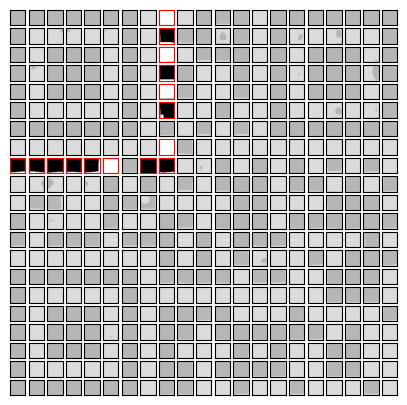

In [26]:
# Let's cross-check with our example
_, axes = plt.subplots(grid_cells_num, grid_cells_num, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):

        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)
        if (i == 8 and j <= 8) or (i <= 8 and j == 8):
            if (i != 6) and (j != 6):
                col.imshow(qr_cells[i][j], cmap="gray", vmin=0, vmax=255)
                col.spines[:].set_color('red')
                continue
        col.imshow(qr_cells[i][j], cmap="gray", vmin=-1275, vmax=510)

In [27]:
# However..... You need to XOR that with the "format mask": 101010000010010
ecl[0] ^= 1
mask[0] ^= 1
mask[2] ^= 1
fec[5] ^= 1
fec[8] ^= 1

# And now we print...
print(ecl, mask, fec)

[0, 1] [0, 1, 0] [0, 1, 0, 1, 0, 0, 0, 1, 1, 1]


#Data extraction

In [28]:
# Before we proceed, let's write a function for masking to make our lives easier
UP, UP_ENC, DOWN, CW, CCW = range(5)  # A rather old-fashioned pythonic "Enum"

def apply_mask(data_start_i, data_start_j, direction):
    '''
    data_start_i/j represent the first cell's coords in its respective direction
    direction is the masking direction, up(-enc)/down/clockwise/anti-clockwise
    '''
    result = []
    row_offsets = []
    col_offsets = []
    if (direction in [UP, UP_ENC]):
        row_offsets = [0,  0, -1, -1, -2, -2, -3, -3]
        col_offsets = [0, -1,  0, -1,  0, -1,  0, -1]
    if (direction == DOWN):
        row_offsets = [0,  0,  1,  1,  2,  2,  3,  3]
        col_offsets = [0, -1,  0, -1,  0, -1,  0, -1]
    if (direction == CW):
        row_offsets = [0,  0,  1,  1,  1,  1,  0,  0]
        col_offsets = [0, -1,  0, -1, -2, -3, -2, -3]
    if (direction == CCW):
        row_offsets = [0,  0, -1, -1, -1, -1,  0,  0]
        col_offsets = [0, -1,  0, -1, -2, -3, -2, -3]

    for i, j in zip(row_offsets, col_offsets):
        cell = qr_cells_numeric[data_start_i+i, data_start_j+j]
        result.append(int(cell if MASKS[mask_str](data_start_i+i, data_start_j+j) else not cell))

    return result[:4] if direction == UP_ENC else result

##Data encodeing

In [29]:
enc_bits = apply_mask(grid_cells_num-1, grid_cells_num-1, UP_ENC)
enc_int = int(''.join([str(bit) for bit in enc_bits]), 2)
print(f'{enc_bits} = Byte encoding (8 bits per character)')
# 0001  Numeric encoding (10 bits per 3 digits)
# 0010  Alphanumeric encoding (11 bits per 2 characters)
# 0100  Byte encoding (8 bits per character)
# 1000  Kanji encoding (13 bits per character)
# ...

[0, 1, 0, 0] = Byte encoding (8 bits per character)


##Data length

In [30]:
len_bits = apply_mask(grid_cells_num-3, grid_cells_num-1, UP)
len_int = int(''.join([str(bit) for bit in len_bits]), 2)
print(f'{len_bits} = {len_int} data symbols, each consisting of 8 bits')

[0, 0, 0, 0, 1, 0, 0, 1] = 9 data symbols, each consisting of 8 bits


##Data extraction and error correction

In [31]:
data_starting_indices = [
    [grid_cells_num-7,  grid_cells_num-1,  UP],    #    w    /     H
    [grid_cells_num-11, grid_cells_num-1,  CCW],   #    w    /     e
    [grid_cells_num-10, grid_cells_num-3,  DOWN],  #    w    /     l
    [grid_cells_num-6,  grid_cells_num-3,  DOWN],  #    .    /     l
    [grid_cells_num-2,  grid_cells_num-3,  CW],    #    w    /     o
    [grid_cells_num-3,  grid_cells_num-5,  UP],    #    i    /     ,
    [grid_cells_num-7,  grid_cells_num-5,  UP],    #    k    /  (space)
    [grid_cells_num-11, grid_cells_num-5,  CCW],   #    i    /     Q
    [grid_cells_num-10, grid_cells_num-7,  DOWN],  #    p    /     R
    [grid_cells_num-6,  grid_cells_num-7,  DOWN],  #    e    /  (space)
    [grid_cells_num-2,  grid_cells_num-7,  CW],    #    d    /     W
    [grid_cells_num-3,  grid_cells_num-9,  UP],    #    i    /     o
    [grid_cells_num-7,  grid_cells_num-9,  UP],    #    a    /     r
    [grid_cells_num-11, grid_cells_num-9,  UP],    #    .    /     l
    [grid_cells_num-16, grid_cells_num-9,  UP],    #    o    /     d
    [grid_cells_num-20, grid_cells_num-9,  CCW],   #    r    /     !
    [grid_cells_num-19, grid_cells_num-11, DOWN],  #    g    /     1
    [grid_cells_num-14, grid_cells_num-11, DOWN],  # End of message (Terminator)
    [grid_cells_num-12, grid_cells_num-11, DOWN],  # E1
    [grid_cells_num-8,  grid_cells_num-11, DOWN],  # E2
    [grid_cells_num-4,  grid_cells_num-11, DOWN],  # E3
    [grid_cells_num-9,  grid_cells_num-13, UP],    # E4
    [grid_cells_num-12, grid_cells_num-16, DOWN],  # E5
    [grid_cells_num-9,  grid_cells_num-18, UP],    # E6
    [grid_cells_num-12, grid_cells_num-20, DOWN],  # E7
]

In [32]:
message_bits = []
message_bits.extend(enc_bits)
message_bits.extend(len_bits)
extracted_data_no_error_correction = ''

In [33]:
for a, b, d in data_starting_indices:  # For each starting index and direction
    bits = apply_mask(a, b, d)  # Extract the bits per the indexed QR code symbol
    bit_string = ''.join([str(bit) for bit in bits])  # Convert to string of bits
    alpha_char = chr(int(bit_string, 2))  # Convert binary to int, then to a char
    if bit_string[:4] == "0000":  # If the first 4 bits are 0s, this is the END
        print(f'{bit_string[:4]}...         = NULL TERMINATOR (END Symbol, SKIP!)')
        message_bits.extend(bits[:4])  # Append only the four bits
    else:  # If not the END symbol, append full set of bits
        message_bits.extend(bits)
        extracted_data_no_error_correction += alpha_char
    print(f'{bit_string} (={int(bit_string, 2):03d}) = {alpha_char}')

01110111 (=119) = w
01100001 (=097) = a
01100001 (=097) = a
01100001 (=097) = a
01100001 (=097) = a
01100001 (=097) = a
01110110 (=118) = v
01100101 (=101) = e
01110011 (=115) = s
0000...         = NULL TERMINATOR (END Symbol, SKIP!)
00001110 (=014) = 
11000001 (=193) = Á
00011110 (=030) = 
11000001 (=193) = Á
00011110 (=030) = 
11000001 (=193) = Á
00011110 (=030) = 
11000001 (=193) = Á
00010001 (=017) = 
00010011 (=019) = 
11100110 (=230) = æ
00010000 (=016) = 
11100101 (=229) = å
10101001 (=169) = ©
01101110 (=110) = n
01110000 (=112) = p


In [34]:
print(f'\ni.e., the data and ECCs in the QR code as-is are "{extracted_data_no_error_correction}"')


i.e., the data and ECCs in the QR code as-is are "waaaaavesÁÁÁÁæå©np"


In [35]:
# For every 8 bits in the extracted message, convert to a byte
message_bytes = [int("".join(map(str, message_bits[i:i+8])), 2) for i in range(0, len(message_bits), 8)]

In [36]:
# Create the Reed-Solomon Codec for 7 ECC symbols
rsc = rs.RSCodec(nsym=7)

# Decode the bytes with the 7-ECC RS Codec
message_decoded = rsc.decode(message_bytes)
print('\nNow decoding...\n')
rsc.maxerrata(verbose=True)
print(f'Decoded message = "{message_decoded[0].decode(encoding="iso-8859-1")}"')
print(f'Decoded ECCs    = "{message_decoded[1][-7:].decode(encoding="iso-8859-1")}"')

ReedSolomonError: Too many errors to correct

In [ ]:
# In order to extract the actual data, need to convert back to bits and...
# ...remove the initial 12 bits (enc and len) and last 4 bits (terminator)
data_bits = bin(int.from_bytes(message_decoded[0], byteorder='big'))[13:-4]

In [ ]:
# Now convert back to bytes and print it lol
# Now convert back to bytes and print it lol
data_bytes = int(data_bits, 2).to_bytes((len(data_bits)+7)//8, 'big')
print(f'Data in message = "{data_bytes.decode(encoding="iso-8859-1")}"')
print(f'Data should be... "Hello, QR World!1" - and yes there\'s a \'1\' after the \'!\'')


#Function

In [ ]:
def is_square(contour, tolerance_ratio=0.2):
    x, y, w, h = cv2.boundingRect(contour)
    return abs(w - h) < tolerance_ratio * max(w, h)